<a href="https://colab.research.google.com/github/ultrasage-danz/Census-Data-Analysis/blob/main/Census_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd


In [34]:
url = "https://raw.githubusercontent.com/ultrasage-danz/Census-Data-Analysis/main/Census%2B2011.csv"
df = pd.read_csv(url)
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [35]:
#remove null values
df.dropna(inplace=True)

# **MAIN WORK**

# **OTHER WORKS**

## **Employment and Workforce Analytics**

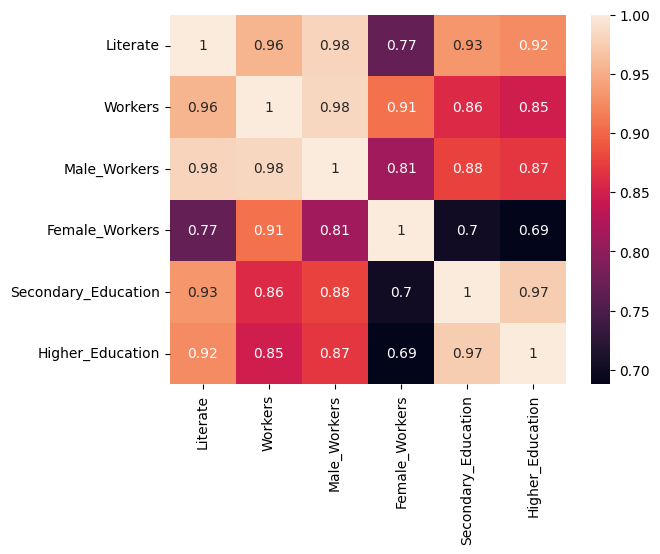

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['Literate', 'Workers', 'Male_Workers', 'Female_Workers', 'Secondary_Education', 'Higher_Education']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## **Religious Diversity and Distribution**

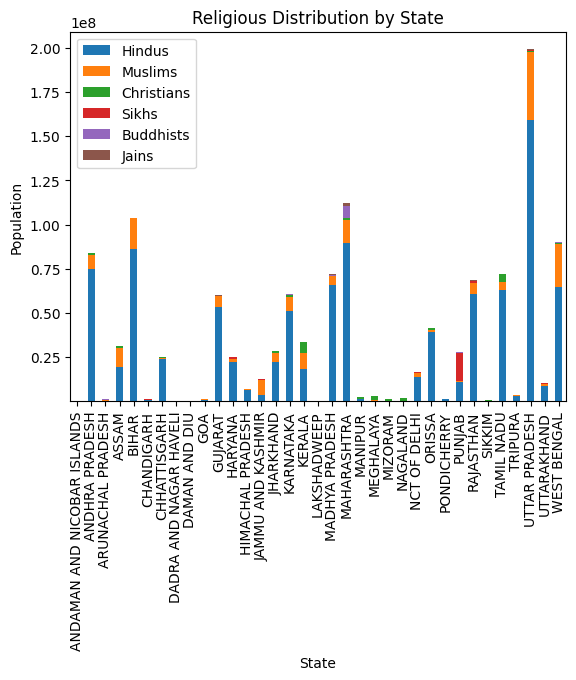

In [37]:
import matplotlib.pyplot as plt
religions = ['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']
df_religion = df.groupby('State_name')[religions].sum()
df_religion.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Religious Distribution by State')
plt.show()

## **Interactive Dashboard**

In [7]:
!pip install dash pandas plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.5 MB/s eta 0:00:00


In [38]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Load your census data
df = pd.read_csv("https://raw.githubusercontent.com/ultrasage-danz/Census-Data-Analysis/main/Census%2B2011.csv")

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="Census Data Dashboard"),

    # Dropdown to select state
    dcc.Dropdown(
        id='state-dropdown',
        options=[{'label': i, 'value': i} for i in df['State_name'].unique()],
        value=df['State_name'].unique()[0]  # Default value
    ),

    # Graph to display data
    dcc.Graph(id='indicator-graphic'),

])

# Callback to update graph based on dropdown selection
@app.callback(
    dash.dependencies.Output('indicator-graphic', 'figure'),
    [dash.dependencies.Input('state-dropdown', 'value')]
)
def update_graph(selected_state):
    filtered_df = df[df['State_name'] == selected_state]
    fig = px.bar(filtered_df, x='District_name', y='Population')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

## **Predictive Modeling**

In [39]:
features = ['Population', 'Workers', 'Male_Workers', 'Female_Workers', 'Secondary_Education', 'Higher_Education']  # Choose relevant features
X = df[features]
y = df['Literate']

In [40]:
from sklearn.preprocessing import OneHotEncoder
  # ... (Encode categorical features if needed)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9812190737.768377
R-squared: 0.9901236043343027


## **Clustering and Segmentation**

In [45]:
features = ['Population', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers', 'Secondary_Education', 'Higher_Education'] # Choose features for clustering
X = df[features]

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42) # Choose an appropriate number of clusters
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

In [48]:
df['cluster'] = kmeans.labels_

In [49]:
df.groupby('cluster')[features].mean() # Examine mean feature values for each cluster

,Population,Literate,Workers,Male_Workers,Female_Workers,Secondary_Education,Higher_Education
cluster,,,,,,,
0,8.645404e+05,5.230176e+05,3.515849e+05,2.357733e+05,115811.584302,8.486359e+04,51376.520349
1,4.427002e+06,2.966997e+06,1.774052e+06,1.238687e+06,535364.364865,5.424199e+05,324721.081081
2,2.471784e+06,1.502616e+06,9.657536e+05,6.635631e+05,302190.433180,2.481459e+05,151433.133641
3,9.895570e+06,7.619068e+06,4.019066e+06,3.035562e+06,983504.200000,1.617429e+06,981445.600000


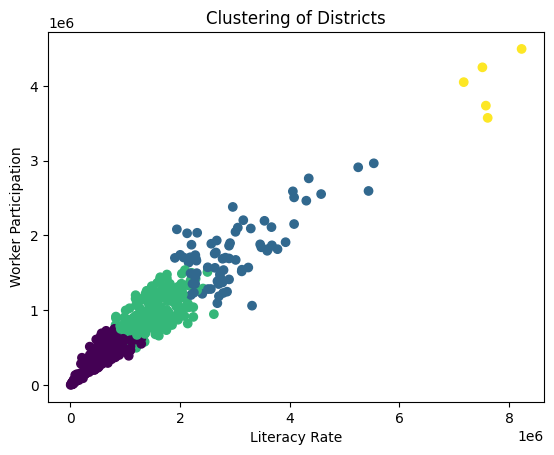

In [50]:
import matplotlib.pyplot as plt
plt.scatter(df['Literate'], df['Workers'], c=df['cluster'])
plt.xlabel('Literacy Rate')
plt.ylabel('Worker Participation')
plt.title('Clustering of Districts')
plt.show()

## **Anomaly Detection**

In [51]:
#remove null values
df.dropna(inplace=True)

In [25]:
features = ['Population', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers', 'Secondary_Education', 'Higher_Education'] # Choose features for anomaly detection
X = df[features]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05, random_state=42) # Adjust contamination as needed
model.fit(X_scaled)
df['anomaly_score'] = model.decision_function(X_scaled)
df['anomaly'] = model.predict(X_scaled) # -1 indicates anomaly

In [28]:
from sklearn.svm import OneClassSVM
model = OneClassSVM(nu=0.05) # Adjust nu as needed
model.fit(X_scaled)
df['anomaly_score'] = model.decision_function(X_scaled)
df['anomaly'] = model.predict(X_scaled) # -1 indicates anomaly

In [29]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=20, contamination=0.05) # Adjust parameters as needed
df['anomaly'] = model.fit_predict(X_scaled) # -1 indicates anomaly

In [30]:
anomalies = df[df['anomaly'] == -1]
print(anomalies)

     District_code         State_name               District_name  Population  \
21              22  JAMMU AND KASHMIR                       Samba      318898   
26              27   HIMACHAL PRADESH                       Mandi      999777   
91              92       NCT OF DELHI                  North East     2241624   
95              96       NCT OF DELHI                        West     2543243   
96              97       NCT OF DELHI                  South West     2292958   
115            116          RAJASTHAN                       Jalor     1828730   
124            125          RAJASTHAN                    Banswara     1797485   
135            136      UTTAR PRADESH                      Rampur     2335819   
151            152      UTTAR PRADESH                Shahjahanpur     3006538   
209            210              BIHAR                  Kishanganj     1690400   
332            333        WEST BENGAL                 Murshidabad     7103807   
334            335        WE

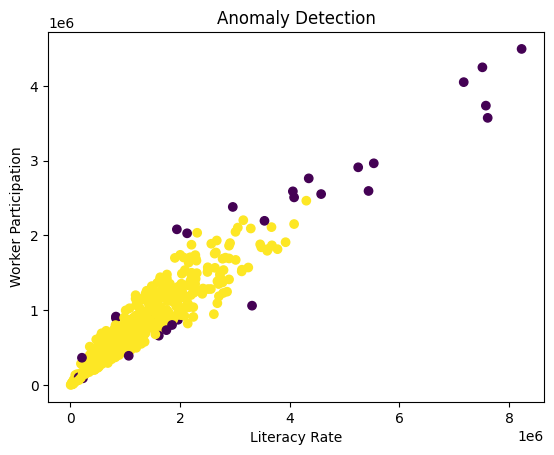

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df['Literate'], df['Workers'], c=df['anomaly'])
plt.xlabel('Literacy Rate')
plt.ylabel('Worker Participation')
plt.title('Anomaly Detection')
plt.show()

## **Geospatial analysis**

In [ ]:
# Alright, let's dive into geospatial analysis with your census data. This will require some additional data sources and libraries.

# 1. Obtain Geospatial Data:

# Infrastructure Data: You'll need geospatial data (shapefiles or GeoJSON) for schools, hospitals, transportation networks, etc. Look for open data sources like OpenStreetMap, government portals, or relevant organizations in your region.
# Land Use Data: Find land use or land cover data for your area, indicating areas designated for urban, agricultural, forest, etc. purposes.
# 2. Install Libraries:


# pip install geopandas folium
# Use code with caution
# GeoPandas: Extends Pandas to work with geospatial data.
# Folium: Creates interactive maps in Python.
# 3. Accessibility Analysis (Example):


# import geopandas as gpd
# import folium

# # Load census data and infrastructure data (replace with your file paths)
# census_df = gpd.read_file('census_data.geojson')  # Assuming your census data has geometry
# hospitals_gdf = gpd.read_file('hospitals.geojson')

# # Calculate distance to nearest hospital for each census district (example)
# census_df['distance_to_hospital'] = census_df.geometry.apply(lambda x: hospitals_gdf.distance(x).min())

# # Create a Folium map
# m = folium.Map(location=[census_df.geometry.centroid.y.mean(), census_df.geometry.centroid.x.mean()], zoom_start=10)

# # Add census districts to the map, colored by distance to hospital
# folium.Choropleth(
#     geo_data=census_df.to_json(),
#     data=census_df,
#     columns=['District_code', 'distance_to_hospital'],
#     key_on='feature.properties.District_code',
#     fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Distance to Nearest Hospital'
# ).add_to(m)

# # Add hospitals as markers
# for idx, row in hospitals_gdf.iterrows():
#     folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# # Display the map
# m
# Use code with caution
# 4. Urban Planning (Example):


# # Load land use data (replace with your file path)
# land_use_gdf = gpd.read_file('land_use.geojson')

# # Filter areas suitable for urban development based on criteria (example)
# suitable_areas = land_use_gdf[
#     (land_use_gdf['land_use_type'] == 'Vacant') &
#     (land_use_gdf.geometry.area > 10000)  # Minimum area threshold
# ]

# # Visualize suitable areas on the map
# folium.GeoJson(suitable_areas.to_json(), name='Suitable Areas').add_to(m)
# Use code with caution
# Explanation:

# Load geospatial data: Use GeoPandas to read shapefiles or GeoJSON files.
# Perform spatial calculations: Calculate distances, areas, or other spatial relationships as needed.
# Visualize on a map: Use Folium to create interactive maps with choropleth layers, markers, and other features.
# Remember:

# Adapt the code: Replace file paths, column names, and criteria based on your specific data.
# Explore spatial analysis techniques: There are many more possibilities, like buffer analysis, overlay analysis, and network analysis.
# Consider environmental factors: Incorporate data on elevation, water resources, protected areas, etc. for comprehensive urban planning.
# This is a starting point for geospatial analysis. Let me know if you have any specific questions or want to explore further!